# Project 01
## Simple word-counting and TF-IDF semantics

In [84]:
# Load sys to read files
import sys

In [30]:
import pandas as pd
import numpy as np
import matplotlib as plt
import string
import re

import os
import requests

import nltk
from nltk.corpus import reuters
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
# nltk.download('reuters')

In [31]:
# List downloaded files

# os.listdir('Data/reuters21578/')

After reading the README text, I know that the collection I am interested in is in the 22 sgm files. 
To access these files, I will use `open as infile`. 

There are 6 files describing the categories used to index the data as well.

Opening just one file as an example:

In [32]:
# Open a first file as an example. Used 'r' because it is text mode parsing (read only).
with open('Data/reuters21578/reut2-008.sgm', 'r', encoding = 'utf-8', errors = 'ignore') as infile:
        data = infile.read()

# To print as a sanity check, uncomment.
#print(data)

Despite the difficult format presentation, the corpus is there. 

I will open all the files in the directory and assemble them in an array called data.

In [59]:
data = []

for i in range(22):
    # Open all filenames. Pad {0} to 3 digits with str methods. 
    # Use range from 0 to 22.
    filename = 'Data/reuters21578/reut2-{0}.sgm'.format(str(i).zfill(3))
    
    # Encoding with most common scheme.
    with open(filename, 'r', encoding = 'utf-8', errors = 'ignore') as infile:
        data.append(infile.read())
        
# Print first 100 characters of the first article
data[0][:600]

'<!DOCTYPE lewis SYSTEM "lewis.dtd">\n<REUTERS TOPICS="YES" LEWISSPLIT="TRAIN" CGISPLIT="TRAINING-SET" OLDID="5544" NEWID="1">\n<DATE>26-FEB-1987 15:01:01.79</DATE>\n<TOPICS><D>cocoa</D></TOPICS>\n<PLACES><D>el-salvador</D><D>usa</D><D>uruguay</D></PLACES>\n<PEOPLE></PEOPLE>\n<ORGS></ORGS>\n<EXCHANGES></EXCHANGES>\n<COMPANIES></COMPANIES>\n<UNKNOWN> \n&#5;&#5;&#5;C T\n&#22;&#22;&#1;f0704&#31;reute\nu f BC-BAHIA-COCOA-REVIEW   02-26 0105</UNKNOWN>\n<TEXT>&#2;\n<TITLE>BAHIA COCOA REVIEW</TITLE>\n<DATELINE>    SALVADOR, Feb 26 - </DATELINE><BODY>Showers continued throughout the week in\nthe Bahia cocoa zone, alle'

All corpora have been set up in an array of arrays. We can see that the text format seems to have a HTML presentation. In order to give some format, I will use BeautifulSoup package.

As a sanity check, I will see what the NLTK package has for 'Reuters' database. 

In [44]:
# nltk.corpus.reuters.raw()

Looks like it is the same database, however the articles are in different order.

Now, I will use BeautifulSoup to parse the text. BeautifulSoup will allow to remove all the HTML tags. There are several ways to do this. I could run a loop and attach an article between the tags of <Body> to a dataframe. (Might do that later - for simplicity now, I will just put it in an array.

In [45]:
from bs4 import BeautifulSoup
example_soup = BeautifulSoup(data[0], 'html.parser')

# print(example_soup.prettify()) # Makes the above easier to read. More as we would see on a describe HTML panel (when scrapping).
# print(example_soup.get_text())  # Removes HTML flags.
# print(example_soup.find_all('body')) # Extracts the text from the HTML tag we choose. This case, the 'Body' tag.

In [46]:
type(example_soup)

bs4.BeautifulSoup

Let's now put all the corpus in the soup. The soup object can just take one index at a time. We need to iterate over our data list.

In [86]:
corpora = []
for text in data:
    # Parse text as html using beautiful soup
    parsed_text = BeautifulSoup(text, 'html.parser')
    table = parsed_text.find_all('body')[0] 
#print(table)

#type(table)

In [88]:
corpora = []
for text in data:
    # Parse text as html using beautiful soup
    parsed_text = BeautifulSoup(text, 'html.parser')
    
    # Extract article between <BODY> and </BODY> and convert to standard text. Add to list of articles
    corpora += [corpora.get_text() for corpora in parsed_text.find_all('body')]

# Print first article as an example
print(corpora[0][:300])

Showers continued throughout the week in
the Bahia cocoa zone, alleviating the drought since early
January and improving prospects for the coming temporao,
although normal humidity levels have not been restored,
Comissaria Smith said in its weekly review.
    The dry period means the temporao will b


In [89]:
df_corpora = pd.DataFrame({'Body': corpora})
df_corpora.head(2)

,Body
0,"Showers continued throughout the week in\nthe Bahia cocoa zone, alleviating the drought since early\nJanuary and improving prospects for the coming temporao,\nalthough normal humidity levels have not been restored,\nComissaria Smith said in its weekly review.\n The dry period means the temporao will be late this year.\n Arrivals for the week ended February 22 were 155,221 bags\nof 60 kilos making a cumulative total for the season of 5.93\nmln against 5.81 at the same stage last year. Again it seems\nthat cocoa delivered earlier on consignment was included in the\narrivals figures.\n Comissaria Smith said there is still some doubt as to how\nmuch old crop cocoa is still available as harvesting has\npractically come to an end. With total Bahia crop estimates\naround 6.4 mln bags and sales standing at almost 6.2 mln there\nare a few hundred thousand bags still in the hands of farmers,\nmiddlemen, exporters and processors.\n There are doubts as to how much of this cocoa would be fit\nfor export as shippers are now experiencing dificulties in\nobtaining +Bahia superior+ certificates.\n In view of the lower quality over recent weeks farmers have\nsold a good part of their cocoa held on consignment.\n Comissaria Smith said spot bean prices rose to 340 to 350\ncruzados per arroba of 15 kilos.\n Bean shippers were reluctant to offer nearby shipment and\nonly limited sales were booked for March shipment at 1,750 to\n1,780 dlrs per tonne to ports to be named.\n New crop sales were also light and all to open ports with\nJune/July going at 1,850 and 1,880 dlrs and at 35 and 45 dlrs\nunder New York july, Aug/Sept at 1,870, 1,875 and 1,880 dlrs\nper tonne FOB.\n Routine sales of butter were made. March/April sold at\n4,340, 4,345 and 4,350 dlrs.\n April/May butter went at 2.27 times New York May, June/July\nat 4,400 and 4,415 dlrs, Aug/Sept at 4,351 to 4,450 dlrs and at\n2.27 and 2.28 times New York Sept and Oct/Dec at 4,480 dlrs and\n2.27 times New York Dec, Comissaria Smith said.\n Destinations were the U.S., Covertible currency areas,\nUruguay and open ports.\n Cake sales were registered at 785 to 995 dlrs for\nMarch/April, 785 dlrs for May, 753 dlrs for Aug and 0.39 times\nNew York Dec for Oct/Dec.\n Buyers were the U.S., Argentina, Uruguay and convertible\ncurrency areas.\n Liquor sales were limited with March/April selling at 2,325\nand 2,380 dlrs, June/July at 2,375 dlrs and at 1.25 times New\nYork July, Aug/Sept at 2,400 dlrs and at 1.25 times New York\nSept and Oct/Dec at 1.25 times New York Dec, Comissaria Smith\nsaid.\n Total Bahia sales are currently estimated at 6.13 mln bags\nagainst the 1986/87 crop and 1.06 mln bags against the 1987/88\ncrop.\n Final figures for the period to February 28 are expected to\nbe published by the Brazilian Cocoa Trade Commission after\ncarnival which ends midday on February 27.\n Reuter\n"
1,"Standard Oil Co and BP North America\nInc said they plan to form a venture to manage the money market\nborrowing and investment activities of both companies.\n BP North America is a subsidiary of British Petroleum Co\nPlc <BP>, which also owns a 55 pct interest in Standard Oil.\n The venture will be called BP/Standard Financial Trading\nand will be operated by Standard Oil under the oversight of a\njoint management committee.\n\n Reuter\n"


## Normalization

After removing the HTML tags, there are still some items that might need further normalization. 
These tasks I can think of as now are: lowering capital letters, removing punctuation signs and digits and changing vocabulary to their lemmas or stems.

In [127]:
# Removing punctuation
df_corpora = df_corpora.replace("\[[0-9]*\]","", regex = True)\
                       .replace('"', '', regex = True)\
                       .replace("\n", ' ', regex = True)\
                       .replace(' Reuter', '', regex = True)

In [128]:
df_corpora.head(1)

,Body,Sentences,Total_Words,Total_Char
0,"Showers continued throughout the week in the Bahia cocoa zone, alleviating the drought since early January and improving prospects for the coming temporao, although normal humidity levels have not been restored, Comissaria Smith said in its weekly review. The dry period means the temporao will be late this year. Arrivals for the week ended February 22 were 155,221 bags of 60 kilos making a cumulative total for the season of 5.93 mln against 5.81 at the same stage last year. Again it seems that cocoa delivered earlier on consignment was included in the arrivals figures. Comissaria Smith said there is still some doubt as to how much old crop cocoa is still available as harvesting has practically come to an end. With total Bahia crop estimates around 6.4 mln bags and sales standing at almost 6.2 mln there are a few hundred thousand bags still in the hands of farmers, middlemen, exporters and processors. There are doubts as to how much of this cocoa would be fit for export as shippers are now experiencing dificulties in obtaining +Bahia superior+ certificates. In view of the lower quality over recent weeks farmers have sold a good part of their cocoa held on consignment. Comissaria Smith said spot bean prices rose to 340 to 350 cruzados per arroba of 15 kilos. Bean shippers were reluctant to offer nearby shipment and only limited sales were booked for March shipment at 1,750 to 1,780 dlrs per tonne to ports to be named. New crop sales were also light and all to open ports with June/July going at 1,850 and 1,880 dlrs and at 35 and 45 dlrs under New York july, Aug/Sept at 1,870, 1,875 and 1,880 dlrs per tonne FOB. Routine sales of butter were made. March/April sold at 4,340, 4,345 and 4,350 dlrs. April/May butter went at 2.27 times New York May, June/July at 4,400 and 4,415 dlrs, Aug/Sept at 4,351 to 4,450 dlrs and at 2.27 and 2.28 times New York Sept and Oct/Dec at 4,480 dlrs and 2.27 times New York Dec, Comissaria Smith said. Destinations were the U.S., Covertible currency areas, Uruguay and open ports. Cake sales were registered at 785 to 995 dlrs for March/April, 785 dlrs for May, 753 dlrs for Aug and 0.39 times New York Dec for Oct/Dec. Buyers were the U.S., Argentina, Uruguay and convertible currency areas. Liquor sales were limited with March/April selling at 2,325 and 2,380 dlrs, June/July at 2,375 dlrs and at 1.25 times New York July, Aug/Sept at 2,400 dlrs and at 1.25 times New York Sept and Oct/Dec at 1.25 times New York Dec, Comissaria Smith said. Total Bahia sales are currently estimated at 6.13 mln bags against the 1986/87 crop and 1.06 mln bags against the 1987/88 crop. Final figures for the period to February 28 are expected to be published by the Brazilian Cocoa Trade Commission after carnival which ends midday on February 27. ",20,487,2855


In this first part of Text Analysis, I want to see, before any text normalization, how many words on average an article has. 

For counting sentences, I am finding all dots (.) followed by a single space. My reasoning is that dots are also used in float numbers. In these scenarios, dots are not followed by a space.

As for words, I am using split and counting by len. 

Characters, just counting the length of the body of an article.

In [129]:
df_corpora['Sentences'] = df_corpora['Body'].str.count('\. ')
df_corpora['Total_Words'] = [len(x.split()) for x in df_corpora['Body'].tolist()]
df_corpora['Total_Char'] = [len(x) for x in df_corpora['Body'].tolist()]

In [130]:
df_corpora.head(4)

,Body,Sentences,Total_Words,Total_Char
0,"Showers continued throughout the week in the Bahia cocoa zone, alleviating the drought since early January and improving prospects for the coming temporao, although normal humidity levels have not been restored, Comissaria Smith said in its weekly review. The dry period means the temporao will be late this year. Arrivals for the week ended February 22 were 155,221 bags of 60 kilos making a cumulative total for the season of 5.93 mln against 5.81 at the same stage last year. Again it seems that cocoa delivered earlier on consignment was included in the arrivals figures. Comissaria Smith said there is still some doubt as to how much old crop cocoa is still available as harvesting has practically come to an end. With total Bahia crop estimates around 6.4 mln bags and sales standing at almost 6.2 mln there are a few hundred thousand bags still in the hands of farmers, middlemen, exporters and processors. There are doubts as to how much of this cocoa would be fit for export as shippers are now experiencing dificulties in obtaining +Bahia superior+ certificates. In view of the lower quality over recent weeks farmers have sold a good part of their cocoa held on consignment. Comissaria Smith said spot bean prices rose to 340 to 350 cruzados per arroba of 15 kilos. Bean shippers were reluctant to offer nearby shipment and only limited sales were booked for March shipment at 1,750 to 1,780 dlrs per tonne to ports to be named. New crop sales were also light and all to open ports with June/July going at 1,850 and 1,880 dlrs and at 35 and 45 dlrs under New York july, Aug/Sept at 1,870, 1,875 and 1,880 dlrs per tonne FOB. Routine sales of butter were made. March/April sold at 4,340, 4,345 and 4,350 dlrs. April/May butter went at 2.27 times New York May, June/July at 4,400 and 4,415 dlrs, Aug/Sept at 4,351 to 4,450 dlrs and at 2.27 and 2.28 times New York Sept and Oct/Dec at 4,480 dlrs and 2.27 times New York Dec, Comissaria Smith said. Destinations were the U.S., Covertible currency areas, Uruguay and open ports. Cake sales were registered at 785 to 995 dlrs for March/April, 785 dlrs for May, 753 dlrs for Aug and 0.39 times New York Dec for Oct/Dec. Buyers were the U.S., Argentina, Uruguay and convertible currency areas. Liquor sales were limited with March/April selling at 2,325 and 2,380 dlrs, June/July at 2,375 dlrs and at 1.25 times New York July, Aug/Sept at 2,400 dlrs and at 1.25 times New York Sept and Oct/Dec at 1.25 times New York Dec, Comissaria Smith said. Total Bahia sales are currently estimated at 6.13 mln bags against the 1986/87 crop and 1.06 mln bags against the 1987/88 crop. Final figures for the period to February 28 are expected to be published by the Brazilian Cocoa Trade Commission after carnival which ends midday on February 27. ",20,487,2855
1,"Standard Oil Co and BP North America Inc said they plan to form a venture to manage the money market borrowing and investment activities of both companies. BP North America is a subsidiary of British Petroleum Co Plc <BP>, which also owns a 55 pct interest in Standard Oil. The venture will be called BP/Standard Financial Trading and will be operated by Standard Oil under the oversight of a joint management committee. ",3,73,433
2,Texas Commerce Bancshares Inc's Texas Commerce Bank-Houston said it filed an application with the Comptroller of the Currency in an effort to create the largest banking network in Harris County. The bank said the network would link 31 banks having 13.5 billion dlrs in assets and 7.5 billion dlrs in deposits. ,2,52,325
3,"BankAmerica Corp is not under pressure to act quickly on its proposed equity offering and would do well to delay it because of the stock's recent poor performance, banking analysts said. Some analysts said they have recommended BankAmerica delay its up to one-billion-dlr equity offering, which has yet to be approved by the Securities and Exchange Commission. BankAmerica stock fell this week

In [161]:
summary = df_corpora.describe().transpose()
summary[['count', 'mean', '50%', 'min', 'max']]


,count,mean,50%,min,max
Sentences,19043.0,6.058079,4.0,0.0,67.0
Total_Words,19043.0,135.061335,89.0,2.0,1668.0
Total_Char,19043.0,830.272856,548.0,6.0,13391.0


This is very interesting. It says that there are articles that have no sentences. Let's explore how many articles have this issue and what could be the cause.

In [154]:
df_corpora[df_corpora['Sentences'] == 0].count()

Body           1761
Sentences      1761
Total_Words    1761
Total_Char     1761
dtype: int64

In [155]:
df_corpora[df_corpora['Sentences'] == 0].head(2)

,Body,Sentences,Total_Words,Total_Char
13,Shr one dlr vs 73 cts Net 12.6 mln vs 15.8 mln Revs 337.3 mln vs 315.2 mln Nine mths Shr 3.07 dlrs vs 3.08 dlrs Net 66 mln vs 66.2 mln Revs 1.59 billion vs 997.1 mln ,0,39,193
33,Qtly div eights cts vs 7.5 cts prior Pay March 31 Record March 13 ,0,15,77


From the information above, we can see this articles might be talking about dividends or revenues, stocks in the market (finance). 

I am gong to leave this here for now, but things that would be worth exploring is if these articles belong to a specific category. If so, it might be worth considering to remove this category (?) or not, depending on what we are going to try to predict. (For example, if I wanted to classify by topic, and the topic "Stock Markets" is included, then, I want to keep this information).

Let's look now at the different distribution plots according to the number of Sentences, Words, and Characters.

Text(0, 0.5, 'Freq')

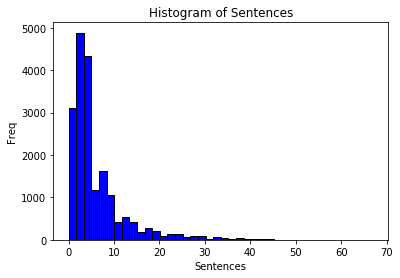

In [142]:
import matplotlib.pyplot as plt

plt.hist(df_corpora['Sentences'], color = 'blue', edgecolor = 'black',
         bins = int(40))
plt.title('Histogram of Sentences')
plt.xlabel('Sentences')
plt.ylabel('Freq')

Text(0, 0.5, 'Freq')

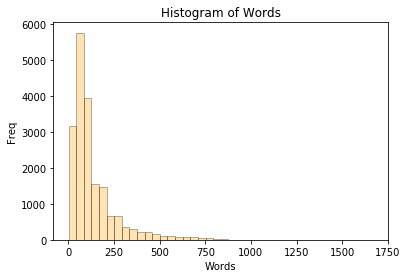

In [147]:
plt.hist(df_corpora['Total_Words'], color = 'orange', edgecolor = 'black', alpha = 0.3,
         bins = int(40))
plt.title('Histogram of Words')
plt.xlabel('Words')
plt.ylabel('Freq')

Text(0, 0.5, 'Freq')

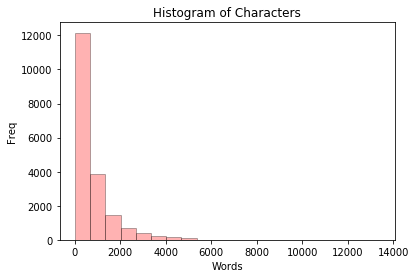

In [148]:
plt.hist(df_corpora['Total_Char'], color = 'red', edgecolor = 'black', alpha = 0.3,
         bins = int(20))
plt.title('Histogram of Characters')
plt.xlabel('Words')
plt.ylabel('Freq')

Out of about 19000 articles, less than 50% have only 4 sentences/89 words/548 characters. I think this is because about 1800 articles were "stock market" articles and these articles are very short and have just shortened words and values. 

In [16]:
# Dictionary where punctuation is mapped to none.
no_punc = str.maketrans('', '', string.punctuation) 

# Remove punctuation from corpora.
corpora = [corpus.translate(no_punc) for corpus in corpora]

In [17]:
# Lowercase all capital letters.
corpora = [corpus.lower() for corpus in corpora]

In [18]:
# Remove digits from corpora.
corpora = [re.sub(r'\d+', '', corpus) for corpus in corpora]
 
# Set English and identified/additional stopwords in order to remove them.
stopwords = set(nltk.corpus.stopwords.words('english') + ['reuter', '\x03', '``','’', '`','br','"',"”", "''", "'s", "\\n"])
corpora = [[word for word in corpus.split() if word not in stopwords] for corpus in corpora]

In [19]:
corpora[0][:10]

['showers',
 'continued',
 'throughout',
 'week',
 'bahia',
 'cocoa',
 'zone',
 'alleviating',
 'drought',
 'since']

In [15]:
example = wnl.lemmatize('continued')
example

'continued'

In [14]:
# Change the corpora's full words for just the lemmas
wnl = WordNetLemmatizer()
corpora_lem = [" ".join([wnl.lemmatize(word) for word in corpus]) for corpus in corpora]
# print the first article as a running example
print(corpora_lem[0])

shower continued throughout week bahia cocoa zone alleviating drought since early january improving prospect coming temporao although normal humidity level restored comissaria smith said weekly review dry period mean temporao late year arrival week ended february bag kilo making cumulative total season mln stage last year seems cocoa delivered earlier consignment included arrival figure comissaria smith said still doubt much old crop cocoa still available harvesting practically come end total bahia crop estimate around mln bag sale standing almost mln hundred thousand bag still hand farmer middleman exporter processor doubt much cocoa would fit export shipper experiencing dificulties obtaining bahia superior certificate view lower quality recent week farmer sold good part cocoa held consignment comissaria smith said spot bean price rose cruzados per arroba kilo bean shipper reluctant offer nearby shipment limited sale booked march shipment dlrs per tonne port named new crop sale also l

In [58]:
# Change the corpora's full words for just the stems
ps = nltk.PorterStemmer()
corpora_stem = [" ".join([ps.stem(word) for word in corpus]) for corpus in corpora]
# print the first article as a running example
print(corpora_stem[0])

shower continu throughout week bahia cocoa zone allevi drought sinc earli januari improv prospect come temporao although normal humid level restor comissaria smith said weekli review dri period mean temporao late year arriv week end februari bag kilo make cumul total season mln stage last year seem cocoa deliv earlier consign includ arriv figur comissaria smith said still doubt much old crop cocoa still avail harvest practic come end total bahia crop estim around mln bag sale stand almost mln hundr thousand bag still hand farmer middlemen export processor doubt much cocoa would fit export shipper experienc dificulti obtain bahia superior certif view lower qualiti recent week farmer sold good part cocoa held consign comissaria smith said spot bean price rose cruzado per arroba kilo bean shipper reluct offer nearbi shipment limit sale book march shipment dlr per tonn port name new crop sale also light open port junejuli go dlr dlr new york juli augsept dlr per tonn fob routin sale butter